







#                                            ....... Online Retail ........





# Project members :

## 1-Ahmed Ehab Mohamed
     ID:2306005
     {Data Cleaning & preprocessing} 

## 2- Hamed Jaber Hamed(Team Leader)

     ID:2306013
## 3-Islam Ahmed Mohammed 
     ID:2306032

     {Data visualization}

## 4-Mohammed Masoud Badran
     ID:2306080
##5-Mohamed Ibrahim Shalaby
     Id:2306075

     {data science techniques}
                                           


# Description of dataset :-

### The Dataset contains a lot of information about Online Retail, and each Product has its own specifications, its own price, and important information for the selling process.



# Data set Goals:-

#### 1-Effective pricing strategies can help to efficiently sell their products in a competitive market and make a profit.
#### 2-Determine the price of Product by taking into account a range of features, based on historical data.
#### 3-Get a better understanding of the most relevant features that help determine the price of a Product.  


# Questions:-

#### 1-The most expensive types of Product ?
#### 2-How many Product do you have?
#### 3-Places that contain Customer?
#### 4-Average used Product prices?
#### 5-How many models are there?
#### 6-How many categories of Product?



# Action Plan:

### 1- Data preprocessing:
         .Data cleaning.
         .Data preparation.
### 2- Data visualization.
### 3- data science techniques:
         .Apriori algorithm





















































In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  #visualization
import matplotlib.pyplot as plt  #visualization
from sklearn.preprocessing import PolynomialFeatures  # regression model
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from scipy.sparse import csr_matrix


In [2]:
#read data
df=pd.read_csv(r'OnlineRetail.CSV')
df.head(8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom


In [3]:
#Check numarcal data
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#  information dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## ● Data cleaning : 

In [5]:
df.drop('Description', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Data type
df.dtypes

InvoiceNo       object
StockCode       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
# Checking null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#missing vales
mask= df.isnull().any(axis=1)
clean_NaN_value= df[~mask]
df=clean_NaN_value
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
# Checking null values
df.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Rename more professional we are Data scientists :)

df.columns=['Invoice_ID','Product_Code','Quantity_Sold','Invoice_Date','Unit_Price','Customer_ID','Country']
df.head()

,Invoice_ID,Product_Code,Quantity_Sold,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data preparation:

In [11]:
# Data type
df.dtypes

Invoice_ID        object
Product_Code      object
Quantity_Sold      int64
Invoice_Date      object
Unit_Price       float64
Customer_ID      float64
Country           object
dtype: object

In [12]:
# Clean CustomerID - Remove null values and convert to integers

df = df.dropna(subset=['Customer_ID'])
df['Customer_ID'] = df['Customer_ID'].astype(int)

In [13]:

# Ensure UnitPrice and Quantity are numeric
df['Unit_Price'] = df['Unit_Price'].astype(float)
df['Quantity_Sold'] = df['Quantity_Sold'].astype(int)
df


,Invoice_ID,Product_Code,Quantity_Sold,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,4,12/9/2011 12:50,4.15,12680,France


In [14]:
# Add a calculated column: Total_Sale (Quantity * UnitPrice)

df['Total_Sale'] = df['Quantity_Sold'] * df['Unit_Price']
df

,Invoice_ID,Product_Code,Quantity_Sold,Invoice_Date,Unit_Price,Customer_ID,Country,Total_Sale
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,4,12/9/2011 12:50,4.15,12680,France,16.60


In [15]:
df.dtypes

Invoice_ID        object
Product_Code      object
Quantity_Sold      int64
Invoice_Date      object
Unit_Price       float64
Customer_ID        int64
Country           object
Total_Sale       float64
dtype: object

In [16]:
#Check numarcal data

df.describe()

,Quantity_Sold,Unit_Price,Customer_ID,Total_Sale
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,20.401854
std,248.693370,69.315162,1713.600303,427.591718
min,-80995.000000,0.000000,12346.000000,-168469.600000
25%,2.000000,1.250000,13953.000000,4.200000
50%,5.000000,1.950000,15152.000000,11.100000
75%,12.000000,3.750000,16791.000000,19.500000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [17]:
#Final data

df.head()

,Invoice_ID,Product_Code,Quantity_Sold,Invoice_Date,Unit_Price,Customer_ID,Country,Total_Sale
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [18]:
# split data
group= df.groupby('Customer_ID')['Unit_Price'].max()
group

Customer_ID
12346      1.04
12347     12.75
12348     40.00
12349    300.00
12350     40.00
          ...  
18280      9.95
18281     16.95
18282     12.75
18283     15.95
18287      8.50
Name: Unit_Price, Length: 4372, dtype: float64

In [19]:
df.Customer_ID.value_counts()

Customer_ID
17841    7983
14911    5903
14096    5128
12748    4642
14606    2782
         ... 
17986       1
13256       1
18184       1
13747       1
15195       1
Name: count, Length: 4372, dtype: int64

In [20]:
group5= df.groupby('Customer_ID')['Unit_Price'].mean()
group5

Customer_ID
12346    1.040000
12347    2.644011
12348    5.764839
12349    8.289041
12350    3.841176
           ...   
18280    4.765000
18281    5.622857
18282    4.821538
18283    1.614987
18287    1.493571
Name: Unit_Price, Length: 4372, dtype: float64

In [21]:
df.Country.value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [22]:
df.Product_Code.value_counts()

Product_Code
85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
85023C       1
35597A       1
16169N       1
90065B       1
90162A       1
Name: count, Length: 3684, dtype: int64

In [23]:
group2= df.groupby('Customer_ID')['Invoice_Date'].max()
group2

Customer_ID
12346    1/18/2011 10:17
12347      8/2/2011 8:48
12348    9/25/2011 13:13
12349    11/21/2011 9:51
12350     2/2/2011 16:01
              ...       
18280      3/7/2011 9:52
18281    6/12/2011 10:53
18282     8/9/2011 15:10
18283     9/5/2011 12:35
18287    5/22/2011 10:39
Name: Invoice_Date, Length: 4372, dtype: object

<Axes: >

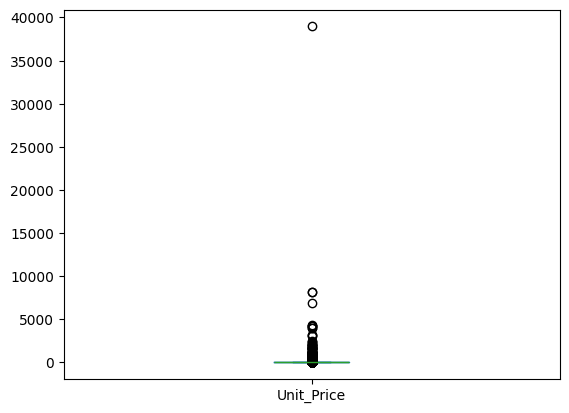

In [24]:
#Chake outliers 

df['Unit_Price'].plot(kind='box')

In [25]:
df['Unit_Price'].nlargest()

222681    38970.00
173277     8142.75
173382     8142.75
173391     6930.00
268027     4287.63
Name: Unit_Price, dtype: float64

In [26]:
#remove outliers
df.drop([222681,173277,173382,173391,268027])

,Invoice_ID,Product_Code,Quantity_Sold,Invoice_Date,Unit_Price,Customer_ID,Country,Total_Sale
0,536365,85123A,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,12680,France,10.20
541905,581587,22899,6,12/9/2011 12:50,2.10,12680,France,12.60
541906,581587,23254,4,12/9/2011 12:50,4.15,12680,France,16.60
541907,581587,23255,4,12/9/2011 12:50,4.15,12680,France,16.60


## ● Data visualization:

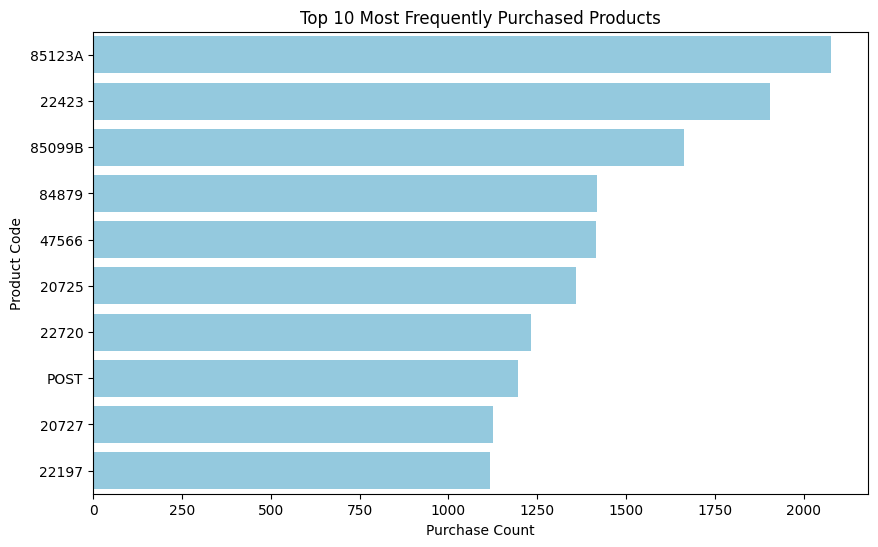

In [27]:
### 1. Bar Chart: Top 10 Most Purchased Products (Using Product_Code)
top_products = df['Product_Code'].value_counts().head(10)

# Plot the top 10 products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, color='skyblue')  # Use a single color
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Purchase Count')
plt.ylabel('Product Code')
plt.show()


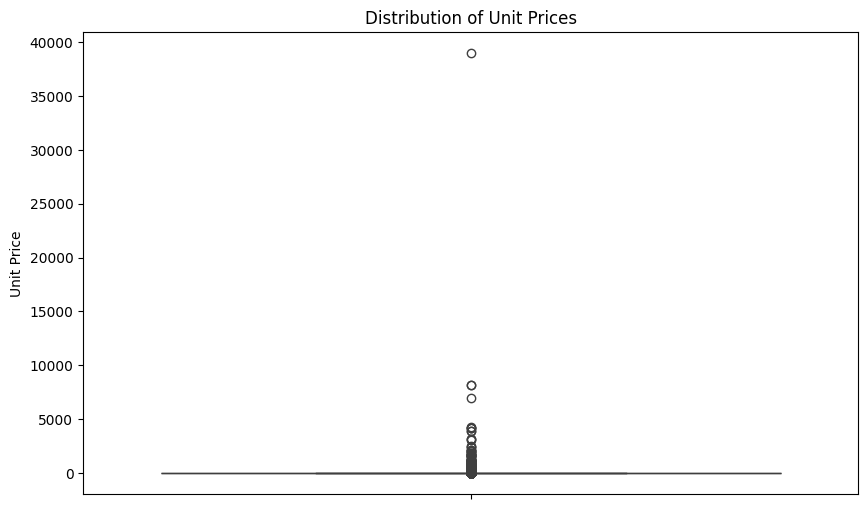

In [28]:
### 2. Box Plot: Distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.boxplot(y='Unit_Price', data=df)
plt.title('Distribution of Unit Prices')
plt.ylabel('Unit Price')
plt.show()


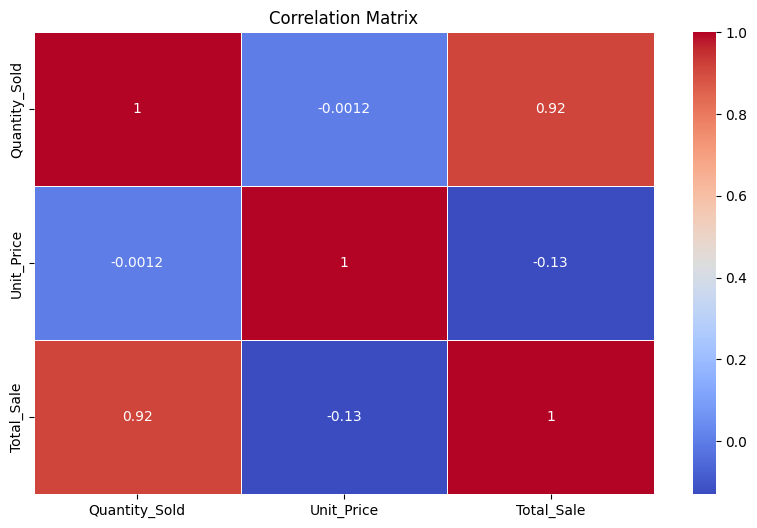

In [29]:
### 3.Heatmap: Correlation Between Numeric Features
correlation_matrix = df[['Quantity_Sold', 'Unit_Price', 'Total_Sale']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


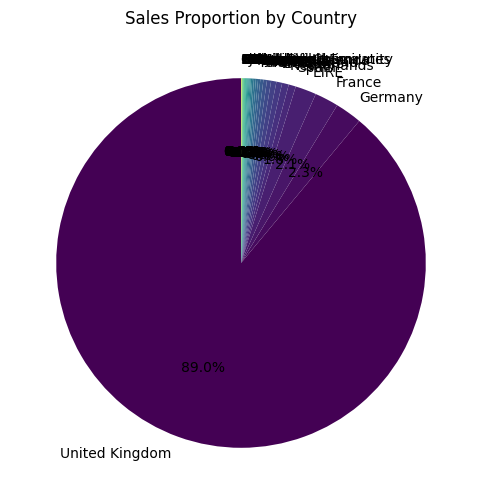

In [30]:
###4 Pie Chart: Proportion of Sales by Country
country_sales = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_sales.plot.pie(autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title('Sales Proportion by Country')
plt.ylabel('')
plt.show()


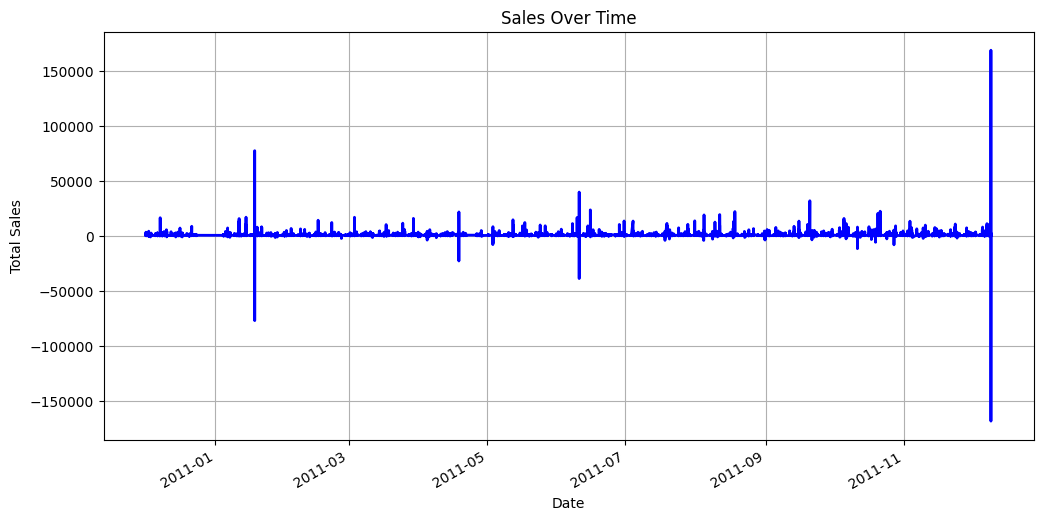

In [31]:
### 5.Line Chart: Sales Over Time
df['Invoice_Date'] = pd.to_datetime(df['Invoice_Date'])
sales_over_time = df.groupby('Invoice_Date').sum()['Total_Sale']
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', color='blue', linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


# Apriori Algorithm

In [32]:

#1
data = list(df['Product_Code'].apply(lambda x:x.split(",") ))
data[:10]

[['85123A'],
 ['71053'],
 ['84406B'],
 ['84029G'],
 ['84029E'],
 ['22752'],
 ['21730'],
 ['22633'],
 ['22632'],
 ['84879']]

In [ ]:
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

In [ ]:
df = apriori(df, min_support = 0.001, use_colnames = True, verbose = 1)
df

In [ ]:
df_ardf_ar = association_rules(df, metric = "confidence", min_threshold = 0.0000001)


In [ ]:
#2
data = list(df['Country'].apply(lambda x:x.split(",") ))
data

In [ ]:
a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

In [ ]:
df = apriori(df, min_support = 0.001, use_colnames = True, verbose = 1)
df

In [ ]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.0000001)
df_ar


# Data insights:

### 1-data are more clearly than ever
### 2-we have knowledge about all the Product models
### 3-we knew anything can affect the Product price
### 4-  custmor will be more comfortable after having enough knowledge about their Products
### 5-people can buy Product easily